<a href="https://colab.research.google.com/github/DzikriNurRochim/Data_science/blob/master/Customer_Shipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [ ]:
data=pd.read_excel("/content/shopping_trend_processed.xlsx")
data

,Customer ID,Age,Age_Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Middle,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Young,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Middle,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Young,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Middle,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Middle,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Middle,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Middle,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Middle,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## Checking the dataset

### Check type of columns in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Age_Groups              3900 non-null   object 
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

### Checking Null Values

In [ ]:
data.isnull().any()

Customer ID               False
Age                       False
Age_Groups                False
Gender                    False
Item Purchased            False
Category                  False
Purchase Amount (USD)     False
Location                  False
Size                      False
Color                     False
Season                    False
Review Rating             False
Subscription Status       False
Shipping Type             False
Discount Applied          False
Promo Code Used           False
Previous Purchases        False
Payment Method            False
Frequency of Purchases    False
dtype: bool

### Checking the statistics summary

In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Bivariate Analysis

###customer id columns

In [ ]:
data['Customer ID'].nunique()

3900

based on `data.describe` show customer id is 3900 then checked again using `data['Customer ID'].nunique()` show 3900 its mean every customer id is unique

### Age Groups Columns

In [ ]:
data['Age_Groups'].unique()

array(['Middle', 'Young', 'Old'], dtype=object)

In [ ]:
data['Age_Groups'].value_counts()

Middle    2160
Young     1313
Old        427
Name: Age_Groups, dtype: int64

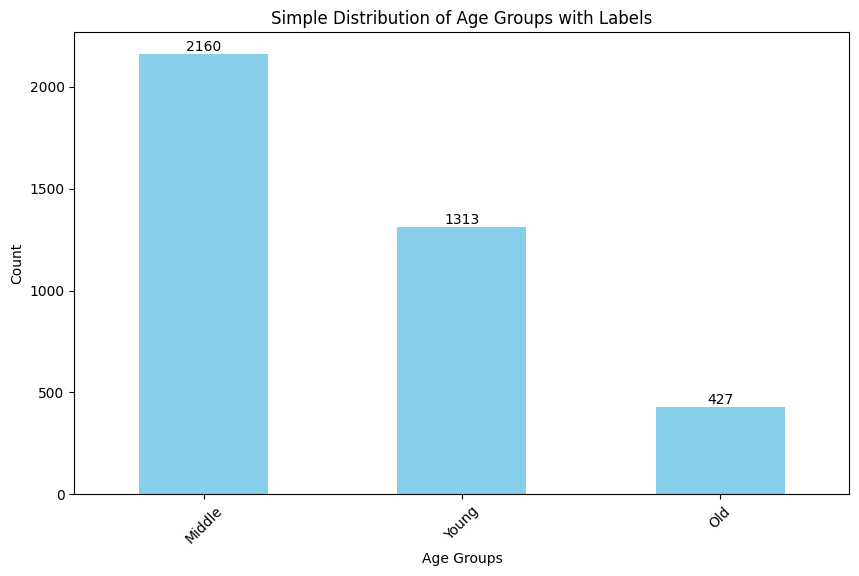

In [ ]:
age_group_counts=data['Age_Groups'].value_counts()
# Creating a simple bar plot with value labels
plt.figure(figsize=(10, 6))
ax = age_group_counts.plot(kind='bar', color='skyblue')

plt.title('Simple Distribution of Age Groups with Labels')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Display the plot
plt.show()


show that `Age_Groups` contain of Young, Middle, and Old.

1313 customer is young

2150 customer is middle

427 customer is old


### Item Purchased

In [ ]:
data['Item Purchased'].nunique()

25

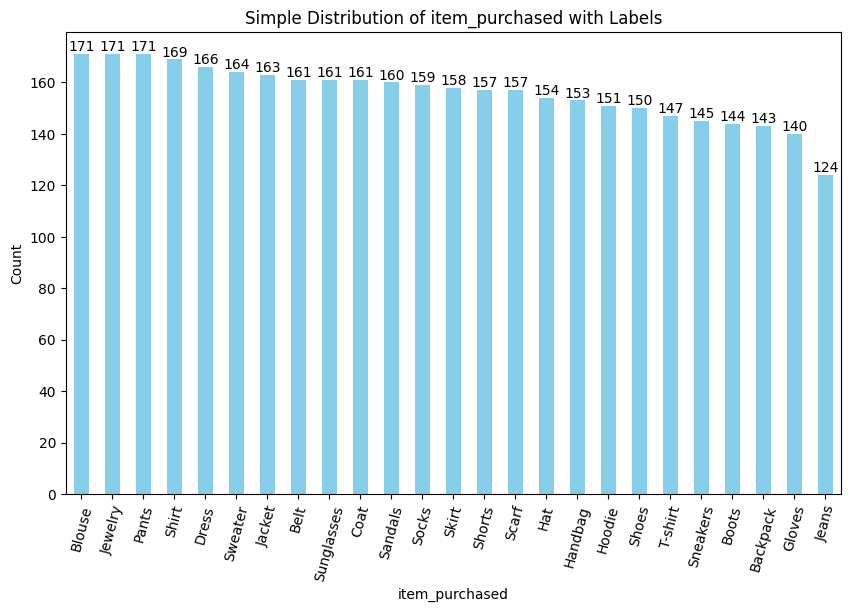

In [ ]:
item_purchased_counts=data['Item Purchased'].value_counts()
plt.figure(figsize=(10, 6))
ax = item_purchased_counts.plot(kind='bar', color='skyblue')

plt.title('Simple Distribution of item_purchased with Labels')
plt.xlabel('item_purchased')
plt.ylabel('Count')
plt.xticks(rotation=75)

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Display the plot
plt.show()

Top 5 item purchased:

1. Blouse with 171 item sold

2. Jewelry with 171 item sold

3. Pants with 171 item sold

4. Shirt with 169 item sold

5. Dress with 166 item sold


Bottom 5 item purchased:

1. Jeans with 124 item purchased

2. Gloves with 140 item purchased

3. Backpack with 143 item purchased

4. Boots with 144 item purchased

5. Sneakers with 145 item purchased


### Category

In [ ]:
data['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

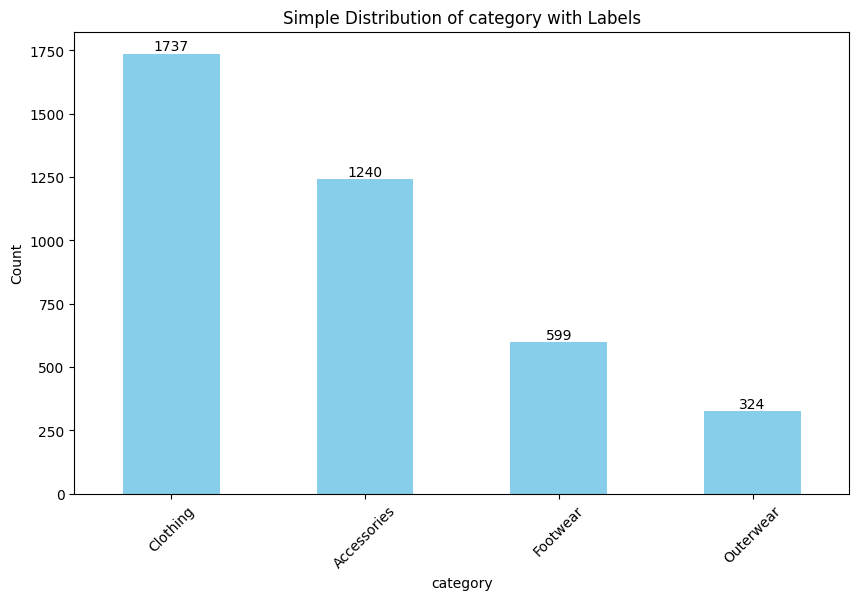

In [ ]:
category_counts=data['Category'].value_counts()
plt.figure(figsize=(10, 6))
ax = category_counts.plot(kind='bar', color='skyblue')

plt.title('Simple Distribution of category with Labels')
plt.xlabel('category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Display the plot
plt.show()

Barchart  sort by high to low values

1. Clothing

2. Accessories

3. Footwear

4. Outerwear

it shows that customer love to bought clothing and accessories than footwear and outerwear.

### Gender

In [ ]:
data['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

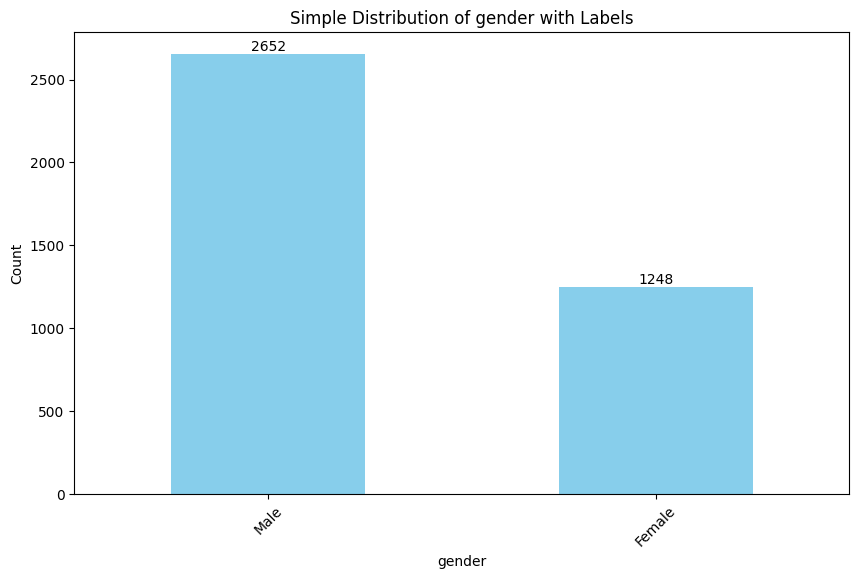

In [ ]:
gender_counts=data['Gender'].value_counts()
plt.figure(figsize=(10, 6))
ax = gender_counts.plot(kind='bar', color='skyblue')

plt.title('Simple Distribution of gender with Labels')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Display the plot
plt.show()

### Purchase Amount

In [ ]:
purchase_counts=data['Purchase Amount (USD)'].value_counts()
purchase_counts.nunique()

27

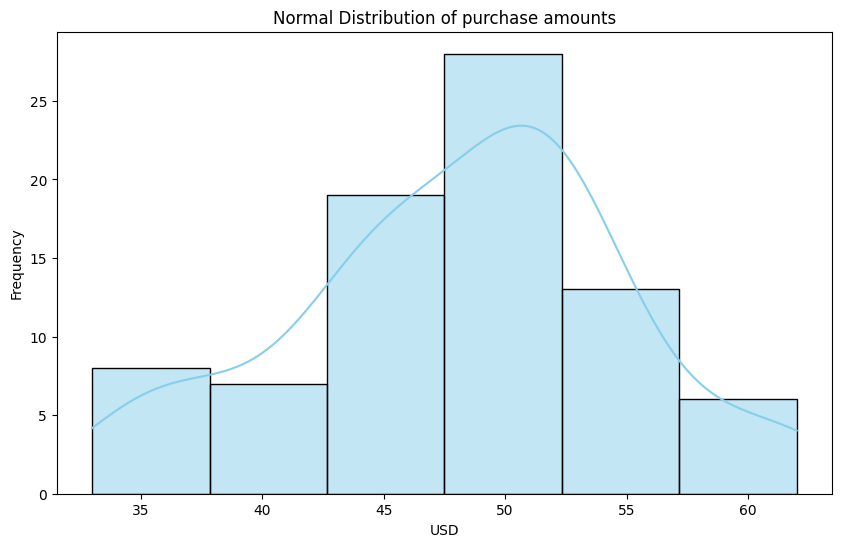

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plotting the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(purchase_counts, kde=True, color='skyblue',bins=6)

plt.title('Normal Distribution of purchase amounts')
plt.xlabel('USD')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Location

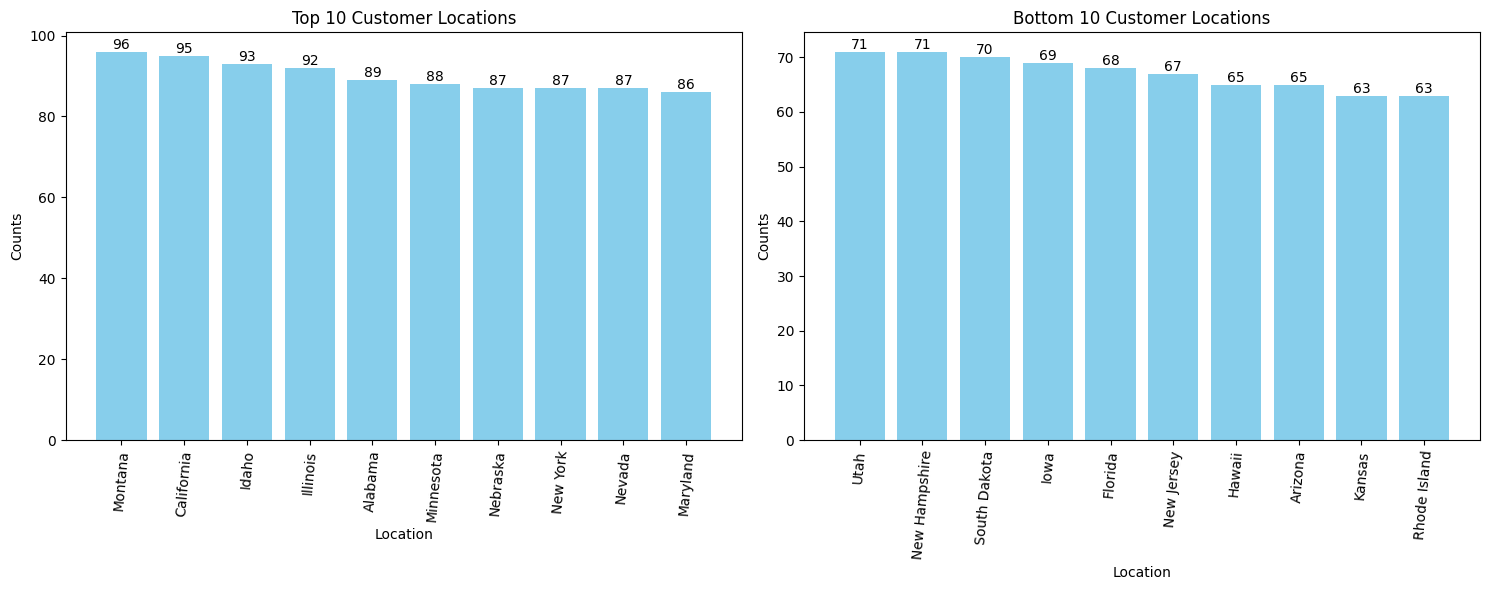

In [ ]:
import matplotlib.pyplot as plt

location_counts = data['Location'].value_counts().sort_values(ascending=False)
top_10 = location_counts.head(10)
bottom_10 = location_counts.tail(10)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the top 10 locations on the left subplot
ax1.bar(top_10.index, top_10.values, color='skyblue')
ax1.set_title('Top 10 Customer Locations')
ax1.set_xlabel('Location')
ax1.set_ylabel('Counts')
ax1.tick_params(axis='x', rotation=85)

# Adding value labels to each bar in the left subplot
for p in ax1.patches:
  ax1.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Plot the bottom 10 locations on the right subplot
ax2.bar(bottom_10.index, bottom_10.values, color='skyblue')
ax2.set_title('Bottom 10 Customer Locations')
ax2.set_xlabel('Location')
ax2.set_ylabel('Counts')
ax2.tick_params(axis='x', rotation=85)

# Adding value labels to each bar in the right subplot
for p in ax2.patches:
  ax2.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the subplots
plt.show()


Top 3 customer location:

1. Montana

2. California

3. idaho

Bottom 3 customer location:

1. Rhode Island

2. Kansas

3. Arizona


### Size

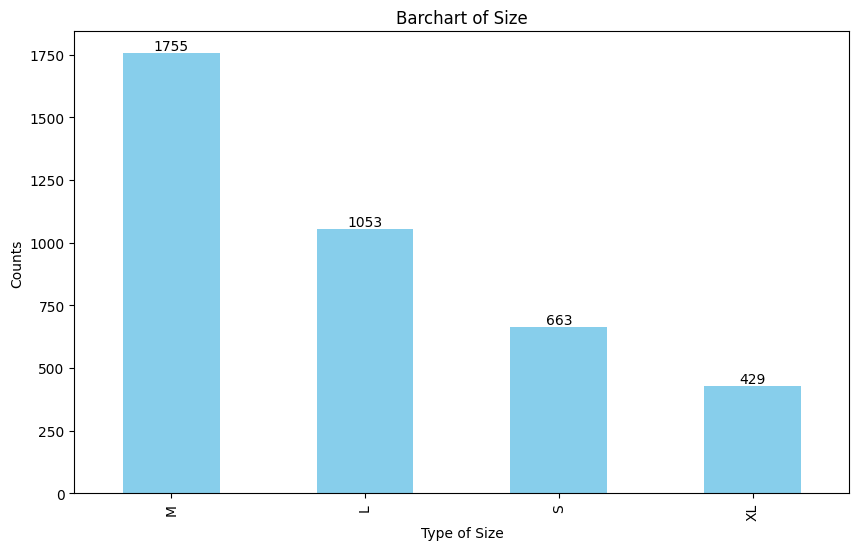

In [ ]:
size_counts=data['Size'].value_counts()

plt.figure(figsize=(10, 6))
ax=size_counts.plot(kind='bar',color='Skyblue')

plt.title('Barchart of Size')
plt.ylabel('Counts')
plt.xlabel('Type of Size')

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

1. size M sold 1755 item

2. size L sold 1053 item

3. size S sold 663 item

4. size XL sold 429 item

### Color

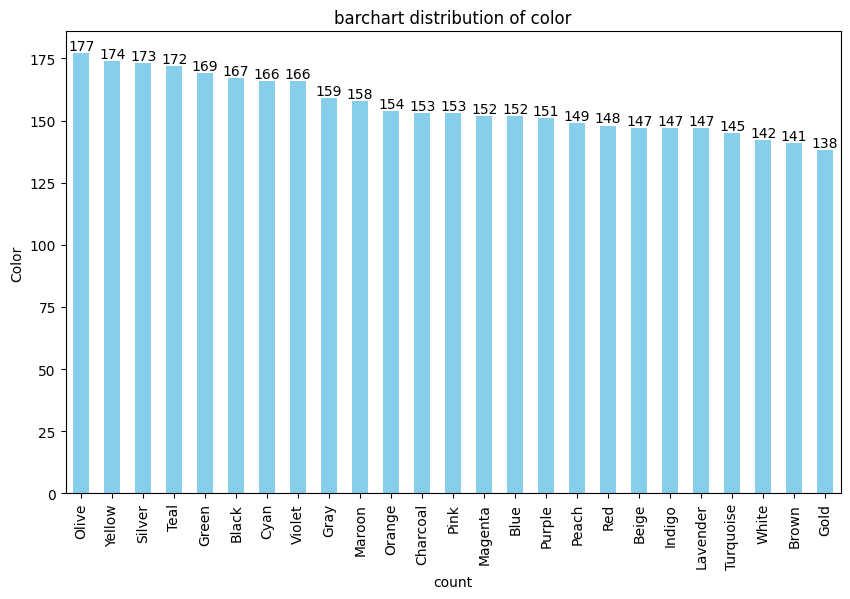

In [ ]:
color_counts=data['Color'].value_counts()
plt.figure(figsize=(10,6))

ax=color_counts.plot(kind='bar',color='skyblue')

plt.title('barchart distribution of color')
plt.xlabel('count')
plt.ylabel('Color')

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

Top 3 color

1. Olive with 177

2. Yellow with 174

3. Silver with 173

Bottom 3:
1. Gold 138

2. Brown 141

3. White 142



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Age_Groups              3900 non-null   object 
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

### Season

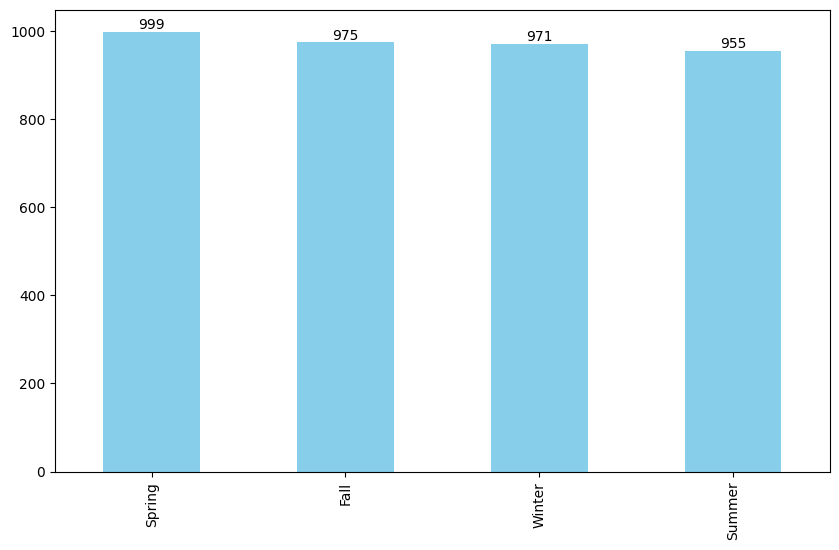

In [ ]:
season_counts=data['Season'].value_counts()
plt.figure(figsize=(10,6))
ax=season_counts.plot(kind='bar',color='skyblue')
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

it show no specific difference amongs those. every season has its own customer, no seasonal peak of customer to buy

### Review Rating

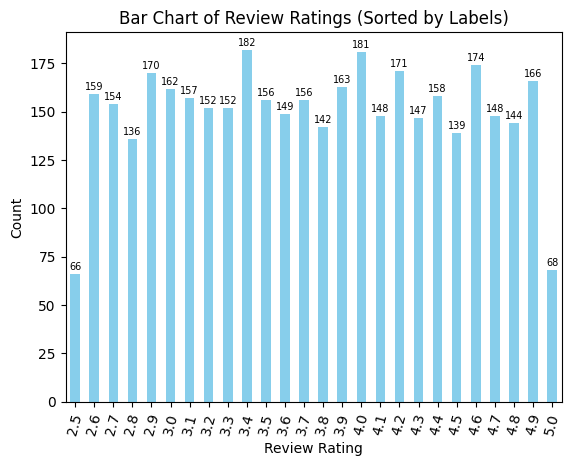

In [ ]:
rr_counts=data['Review Rating'].value_counts()
# Sort the index (labels) of rr_counts
rr_counts_sorted = rr_counts.sort_index()

# Create a bar chart
ax = rr_counts_sorted.plot(kind='bar', color='skyblue')

# Set labels for the x-axis and y-axis
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=75)
# Set the title for the plot
plt.title('Bar Chart of Review Ratings (Sorted by Labels)')

for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
rr_counts.sort_index()

2.5     66
2.6    159
2.7    154
2.8    136
2.9    170
3.0    162
3.1    157
3.2    152
3.3    152
3.4    182
3.5    156
3.6    149
3.7    156
3.8    142
3.9    163
4.0    181
4.1    148
4.2    171
4.3    147
4.4    158
4.5    139
4.6    174
4.7    148
4.8    144
4.9    166
5.0     68
Name: Review Rating, dtype: int64

### Subscription Status

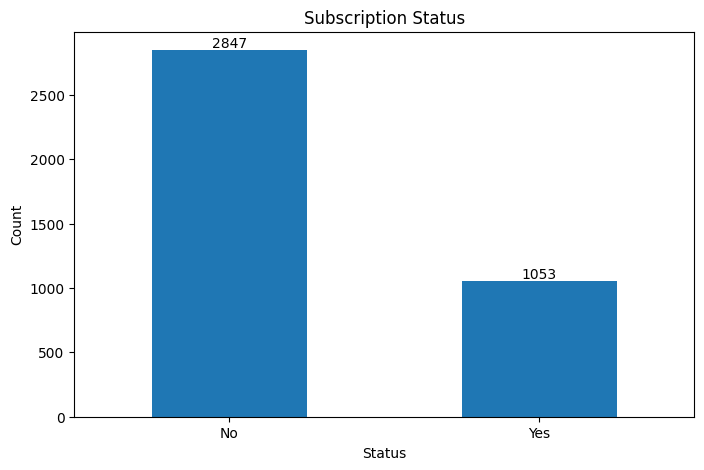

In [ ]:
subs_counts=data['Subscription Status'].value_counts()
plt.figure(figsize=(8,5))

ax=subs_counts.plot(kind='bar')
plt.title('Subscription Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [ ]:
subs_counts = data['Subscription Status'].value_counts()

# Calculate the total count
total_count = subs_counts.sum()

# Calculate the percentages
subs_counts

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

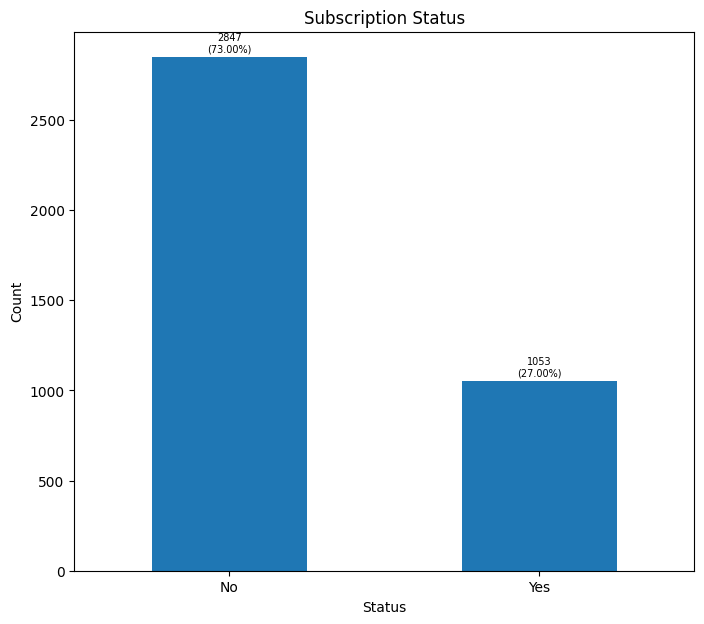

In [ ]:

# Assuming 'Subscription Status' is a categorical variable in your DataFrame
subs_counts = data['Subscription Status'].value_counts()

# Calculate the total count
total_count = subs_counts.sum()

# Calculate the percentages
percentages = (subs_counts / total_count) * 100

# Create the bar chart
plt.figure(figsize=(8, 7))
ax = subs_counts.plot(kind='bar')
plt.title('Subscription Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Display percentages on top of the bars
plt.xticks(rotation=0)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{height}\n({percentages[i]:.2f}%)',xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0,10),fontsize=7, textcoords='offset points')

plt.show()


it shows customer
1. do subscription with 1053 customer represent 27% of total customer

2. not subscription 2847 customer represent 73% of total customer

### Shipping Type

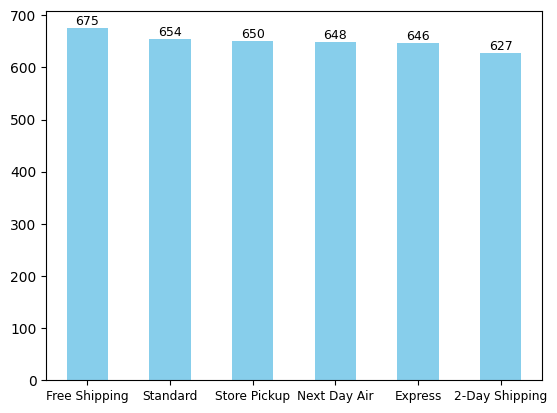

In [ ]:
shipping_counts=data['Shipping Type'].value_counts()

ax=shipping_counts.plot(kind='bar',color='skyblue')
plt.xticks(rotation=0,fontsize=8.7)
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5),fontsize=9, textcoords='offset points')
plt.show()


it shows no specific types of shipping customer to pick


### Discount Applied

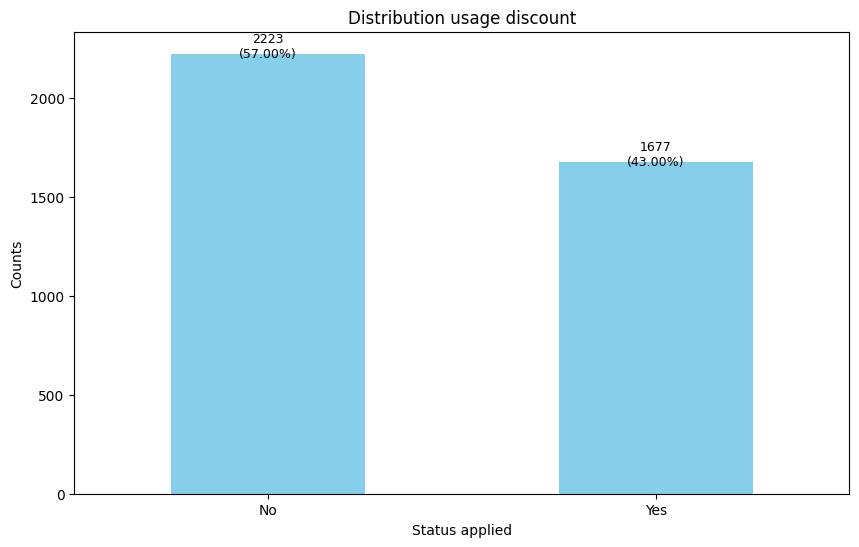

In [ ]:
# create new variable
disc_counts=data['Discount Applied'].value_counts()
disc_percent=(disc_counts/disc_counts.sum())*100


#plotting
plt.figure(figsize=(10,6))
ax=disc_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution usage discount')
plt.xlabel('Status applied')
plt.ylabel('Counts')
plt.xticks(rotation=0)

#annotation
for i, p in enumerate(ax.patches):
    height=p.get_height()
    ax.annotate(f'{height}\n({disc_percent[i]:.2f}%)',xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',xytext=(0, 5),fontsize=9,textcoords='offset points')
plt.show()

it shows
1. 2223 customer represent 57% of customer didnt use discount

2. 1677 customer use discount its around 43% of total customer.

### Promo Code Used

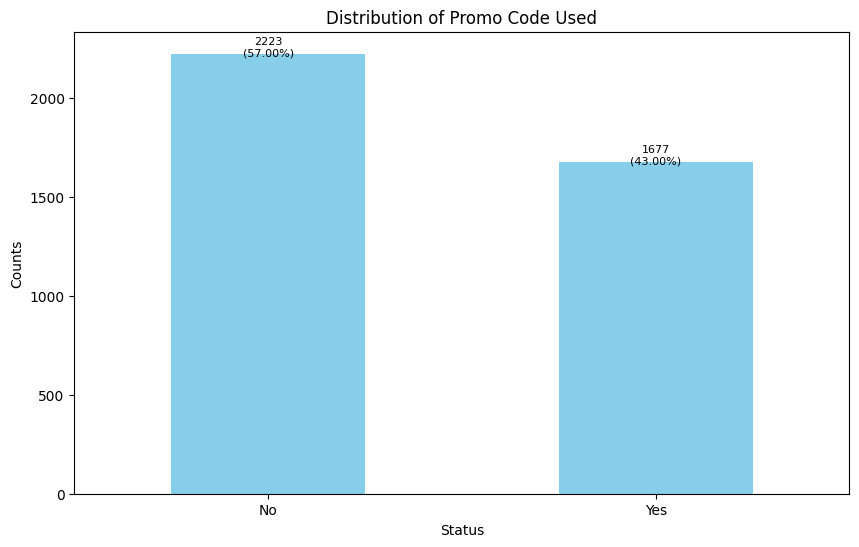

In [ ]:
promo_counts=data['Promo Code Used'].value_counts()
promo_percent=(promo_counts/promo_counts.sum())*100

plt.figure(figsize=(10,6))
ax=promo_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution of Promo Code Used')
plt.xlabel('Status')
plt.ylabel('Counts')
plt.xticks(rotation=0)

#annotation
for i, p in enumerate(ax.patches):
    height=p.get_height()
    ax.annotate(f'{height}\n({promo_percent[i]:.2f}%)',xy=(p.get_x()+p.get_width()/2.,p.get_height()),
              ha='center',va='center',xytext=(0, 5),fontsize=8,textcoords='offset points')
plt.show()

#### Checking `Promo Code Used` to `Discount Applied` cause has same value

In [ ]:

# Check if the two columns have the same values
are_columns_equal = data["Promo Code Used"].equals(data["Discount Applied"])

# Print the result
if are_columns_equal:
    print("Both columns have the same values.")
else:
    print("Columns have different values.")

Both columns have the same values.


### Previous Purchases

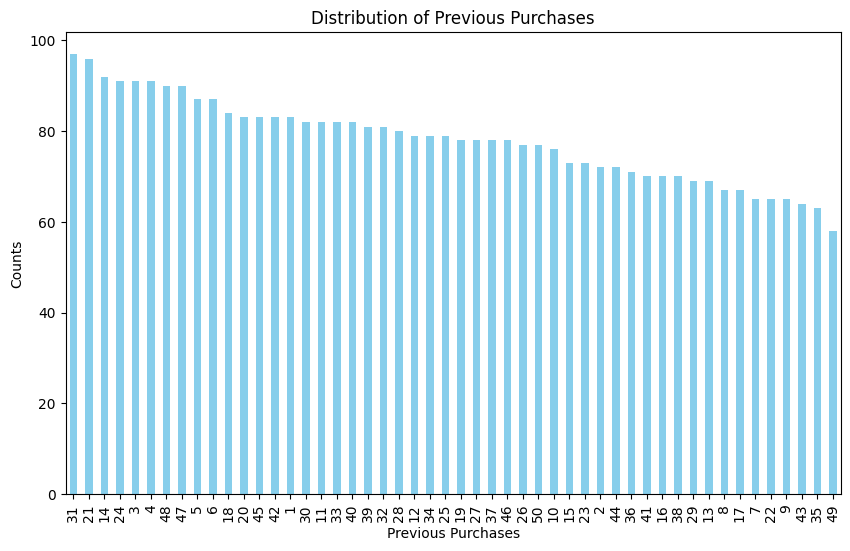

In [ ]:
prev_counts=data['Previous Purchases'].value_counts()
prev_percent=(prev_counts/prev_counts.sum())*100

plt.figure(figsize=(10,6))
ax=prev_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution of Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Counts')
plt.show()

### Payment Method

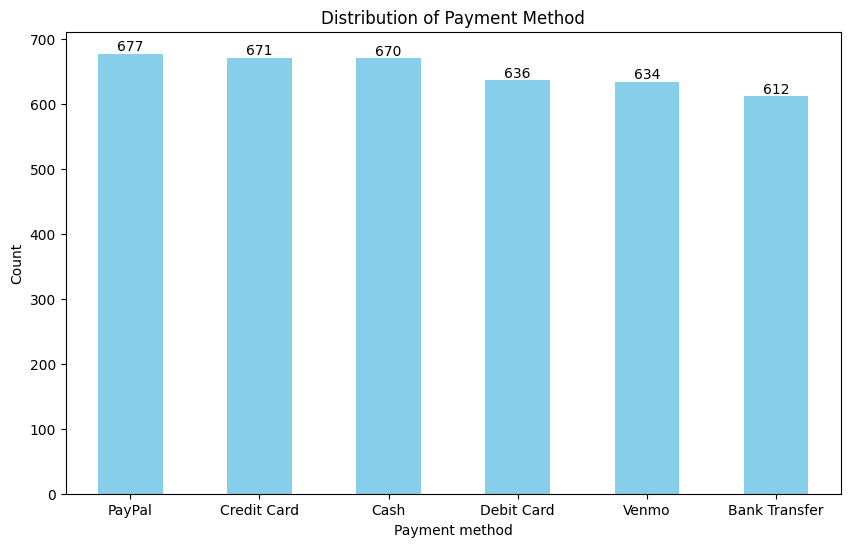

In [ ]:
#create a variabel
payment_count=data['Payment Method'].value_counts()

#plotting
plt.figure(figsize=(10,6))
ax=payment_count.plot(kind='bar',color='skyblue')
plt.title('Distribution of Payment Method')
plt.xlabel('Payment method')
plt.ylabel('Count')
plt.xticks(rotation=0)

#annotation
for p in ax.patches:
  height=p.get_height()
  width=p.get_width()
  x=p.get_x()
  ax.annotate(text=str(height),xy=(x+width/2.,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.show()

### Frequency of Purchases

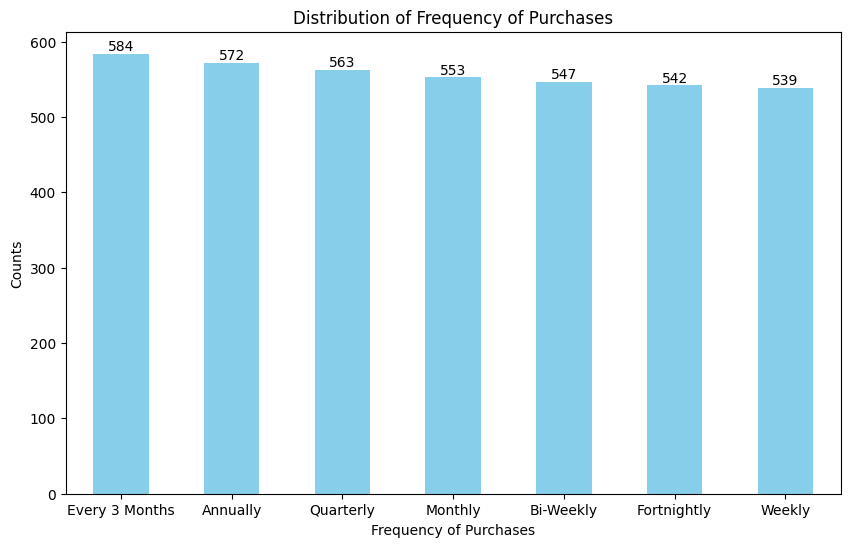

In [ ]:
frequency_counts=data['Frequency of Purchases'].value_counts()

plt.figure(figsize=(10,6))
ax=frequency_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution of Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for p in ax.patches:
  height=p.get_height()
  width=p.get_width()
  x=p.get_x()
  ax.annotate(text=str(height),xy=(x+width/2.,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.show()

## Bivariate Analysis
Bivariate analysis is a statistical method used in data analysis and statistics to understand the relationship between two different variables. It involves examining the association, correlation, or interaction between two variables to determine how they are related. Here are some key points about bivariate analysis:


Two Variables: Bivariate analysis focuses on two variables at a time. These variables can be of different types, such as numerical and categorical, and they may represent different aspects of a dataset.


Purpose: The primary purpose of bivariate analysis is to investigate the relationship between the two variables. It helps answer questions like: Does a change in one variable affect the other? Are the variables related in some way?


Types of Bivariate Analysis:







> 1. Numerical-Numerical: When both variables under consideration are numerical, you can perform statistical tests like correlation analysis to measure the strength and direction of the linear relationship between them.

 >>>Hypotheses:
 >>Null Hypothesis (H0): The two categorical variables are independent (no association).
Alternative Hypothesis (Ha): The two categorical variables are dependent (there is an association).

 >>>If p-values ≤α(chi-square), it is considered statistically significant, and you reject the null hypothesis in favor of the alternative hypothesis.
 If p-values>α(chi-square), you fail to reject the null hypothesis.

 >>> P-Value: The p-value associated with the chi-squared statistic tells you the probability of observing such an extreme result if the variables were independent. A small p-value (typically < 0.05) indicates evidence against the null hypothesis.


> 2. Categorical-Categorical: When both variables are categorical, you can use methods like contingency tables and chi-squared tests to determine if there's an association or dependence between them.

> 3. Numerical-Categorical: When one variable is numerical and the other is categorical, you can use techniques like t-tests or analysis of variance (ANOVA) to compare means or distributions of the numerical variable across different categories of the categorical variable.

> 4. Time Series Analysis: In some cases, bivariate analysis can involve the analysis of two time series variables to study patterns and dependencies over time.

Visualization: Bivariate analysis often involves creating visualizations to better understand the relationship. Common visualizations include scatter plots for numerical-numerical relationships and bar charts or stacked bar charts for categorical-categorical relationships.

Hypothesis Testing: In some cases, bivariate analysis may include hypothesis testing to determine if the observed relationship between the two variables is statistically significant.

Limitations: Bivariate analysis is limited to studying the relationship between two variables. If you want to explore the relationship between more than two variables simultaneously, you may need to perform multivariate analysis.

Bivariate analysis is a fundamental step in data analysis, and it provides valuable insights into how two variables are connected or if they have any meaningful relationship. It's often used to inform further analysis and decision-making in various fields, including statistics, economics, social sciences, and data science.

### Do chi-test square statistic for categorical-categorical columns

#### checking dataset using `.info()` to get which are typically object or categorical

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Age_Groups              3900 non-null   object 
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

#### Categorical to categorical

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Select the relevant columns from your DataFrame
selected_columns = ['Age_Groups', 'Gender', 'Item Purchased', 'Category', 'Location',
                    'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type',
                    'Discount Applied', 'Promo Code Used', 'Payment Method',
                    'Frequency of Purchases']
data_subset = data[selected_columns]

# Create an empty DataFrame to store the p-values
p_values_df = pd.DataFrame(index=data_subset.columns, columns=data_subset.columns)
chitest_df=pd.DataFrame(index=data_subset.columns, columns=data_subset.columns)
chitest_df
p_values_df

,Age_Groups,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
Age_Groups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subscription Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shipping Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


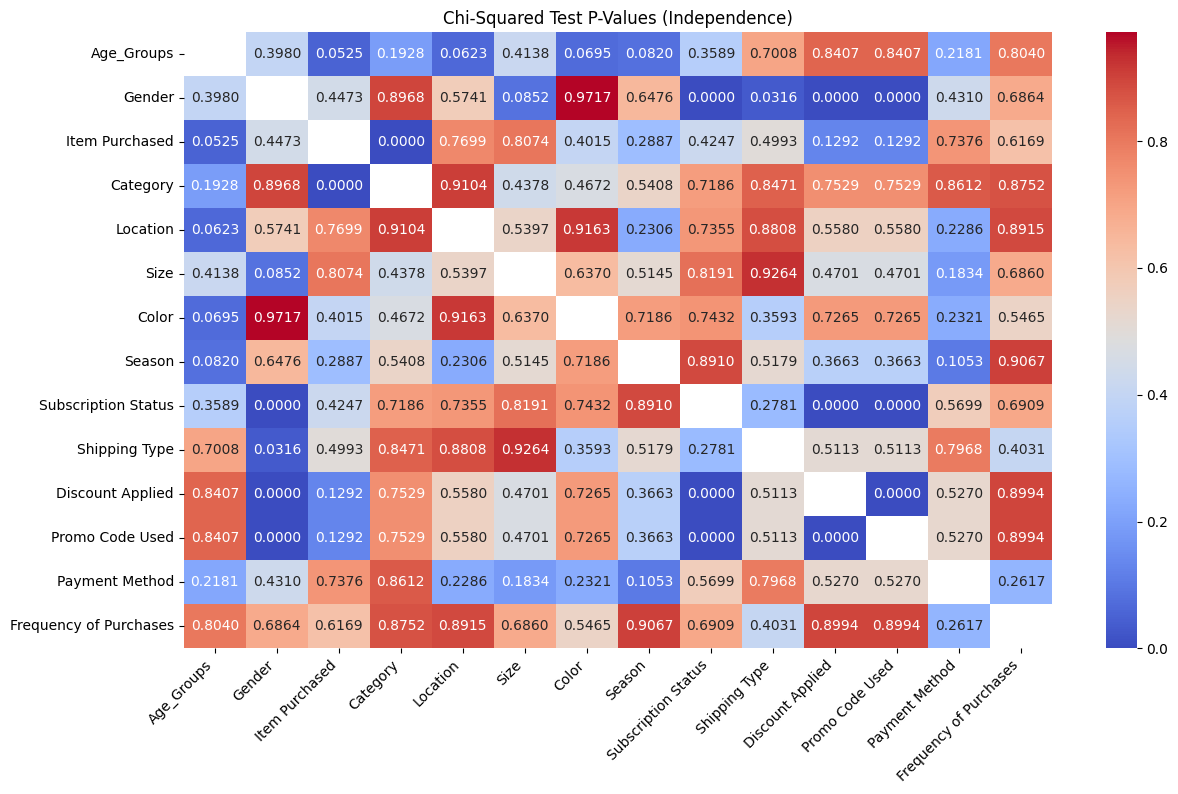

In [ ]:
# Perform chi-squared test for each pair of columns
for col1 in data_subset.columns:
    for col2 in data_subset.columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(data_subset[col1], data_subset[col2])

            # Perform chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Store the p-value in the DataFrame
            p_values_df.loc[col1, col2] = p
            chitest_df.loc[col1,col2]=chi2


# Convert p-values to numeric values
p_values_df = p_values_df.apply(pd.to_numeric)


# Create a heatmap of p-values
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(p_values_df, cmap='coolwarm', annot=True, fmt=".4f", cbar=True)

# Show column and row labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

plt.title("Chi-Squared Test P-Values (Independence)")
plt.show()


In [ ]:
significant_p_values_df=p_values_df[p_values_df<=0.05]
significant_p_values_df

,Age_Groups,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
Age_Groups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.326863e-149,0.031607,1.764538e-302,1.764538e-302,NaN,NaN
Item Purchased,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subscription Status,NaN,3.326863e-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
Shipping Type,NaN,3.160742e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### change type of `chitest_df` from object to numeric

In [ ]:
chitest_df.dtypes
chitest_df=chitest_df.apply(pd.to_numeric)

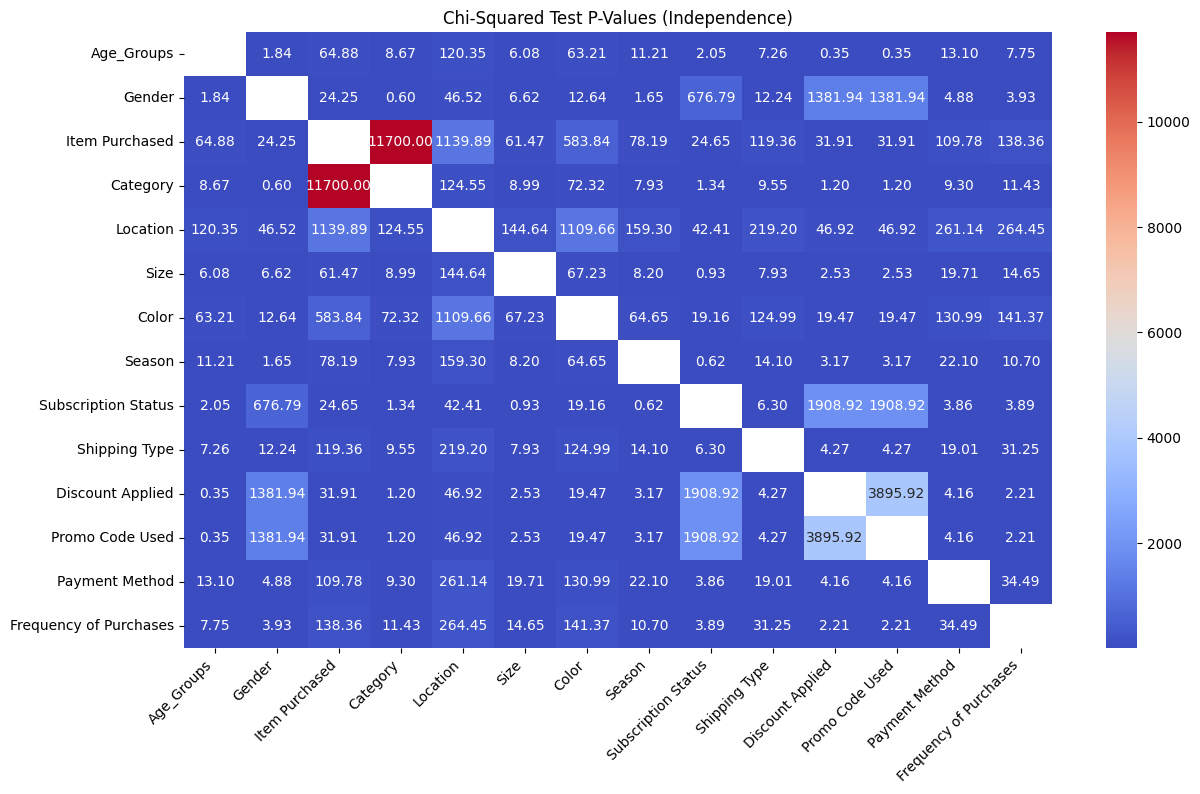

In [ ]:
# Create a heatmap of p-values
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(chitest_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

# Show column and row labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

plt.title("Chi-Squared Test P-Values (Independence)")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Gender'], data['Category'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Squared Statistic: 0.5984208314833445
P-Value: 0.8967937925861854


#### Numerical to numerical

<ipython-input-42-5025740a763c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


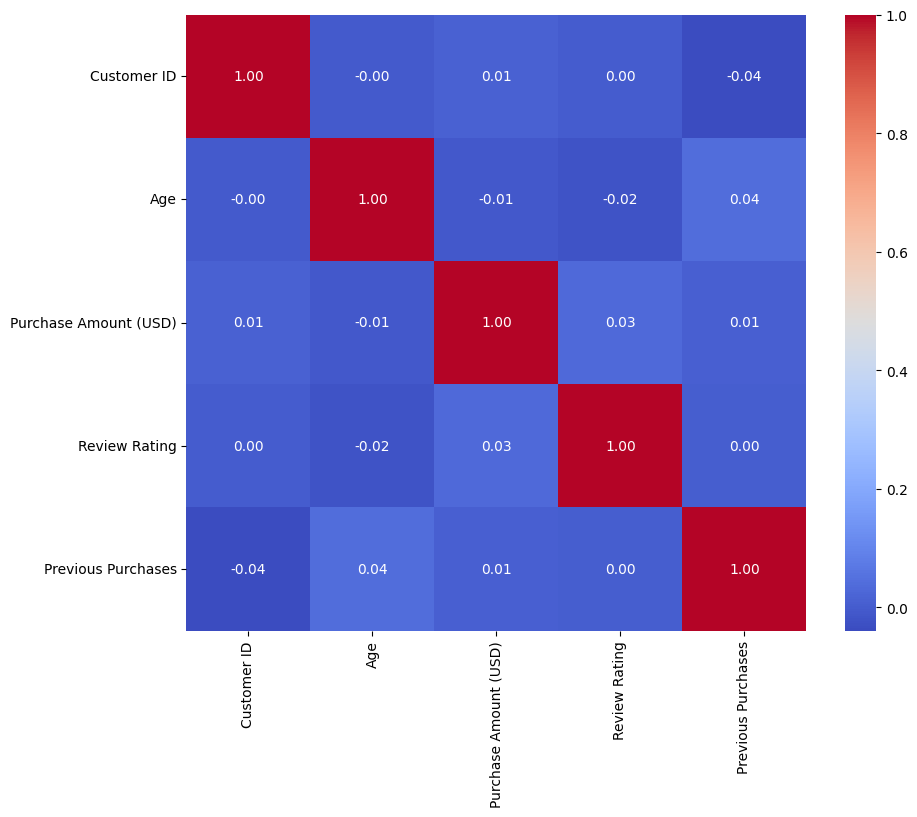

In [ ]:
corr=data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Age_Groups              3900 non-null   object 
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load your dataset


# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform pairwise ANOVA
results = []

for num_column in numerical_columns:
    for cat_column in categorical_columns:
        # Create groups for the ANOVA test
        groups = [data[num_column][data[cat_column] == category] for category in data[cat_column].unique()]

        # Perform ANOVA
        f_statistic, p_value = f_oneway(*groups)

        # Store the results
        results.append({
            'Numerical Variable': num_column,
            'Categorical Variable': cat_column,
            'F-Statistic': f_statistic,
            'P-Value': p_value
        })

# Convert the results to a DataFrame
anova_results = pd.DataFrame(results)

# Display the results
print(anova_results)


    Numerical Variable    Categorical Variable  F-Statistic   P-Value
0          Customer ID              Age_Groups     0.454973  0.634499
1          Customer ID                  Gender  7328.959913  0.000000
2          Customer ID          Item Purchased     1.439061  0.076461
3          Customer ID                Category     0.213278  0.887249
4          Customer ID                Location     1.017519  0.439715
..                 ...                     ...          ...       ...
65  Previous Purchases           Shipping Type     1.476730  0.193911
66  Previous Purchases        Discount Applied     2.160669  0.141664
67  Previous Purchases         Promo Code Used     2.160669  0.141664
68  Previous Purchases          Payment Method     0.560970  0.730030
69  Previous Purchases  Frequency of Purchases     1.593267  0.144793

[70 rows x 4 columns]


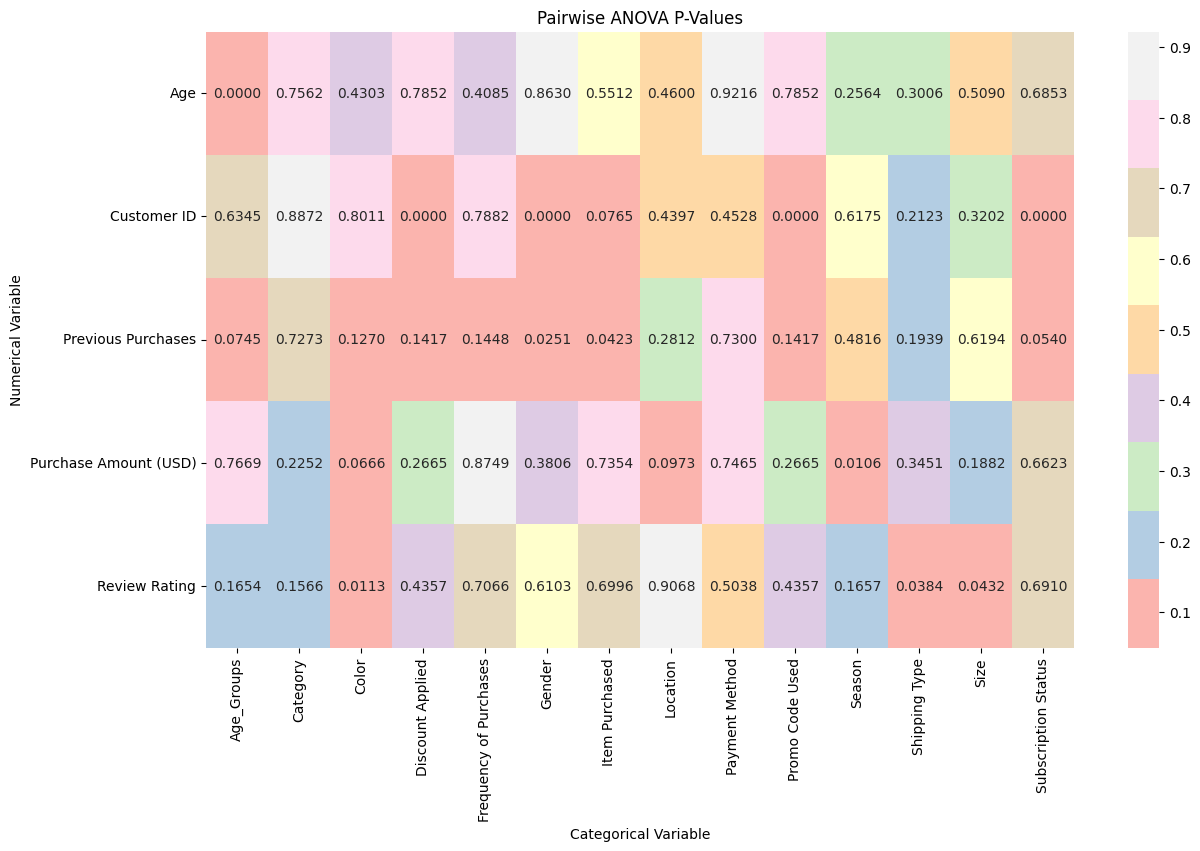

In [ ]:

# Create a pivot table for the heatmap
heatmap_data = anova_results.pivot(index='Numerical Variable', columns='Categorical Variable', values='P-Value')



# Create the heatmap with the custom colormap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Pastel1', cbar=True, fmt=".4f",vmin=0.05)
plt.title('Pairwise ANOVA P-Values')
plt.show()


Significant ANOVA Results:
       Numerical Variable Categorical Variable   F-Statistic   P-Value
1             Customer ID               Gender   7328.959913  0.000000
8             Customer ID  Subscription Status   5639.559018  0.000000
10            Customer ID     Discount Applied  10828.107714  0.000000
11            Customer ID      Promo Code Used  10828.107714  0.000000
14                    Age           Age_Groups   7492.467980  0.000000
35  Purchase Amount (USD)               Season      3.746118  0.010576
47          Review Rating                 Size      2.716691  0.043155
48          Review Rating                Color      1.776577  0.011263
51          Review Rating        Shipping Type      2.352819  0.038365
57     Previous Purchases               Gender      5.022580  0.025075
58     Previous Purchases       Item Purchased      1.550787  0.042311

Non-Significant ANOVA Results:
       Numerical Variable    Categorical Variable  F-Statistic   P-Value
0             Cu

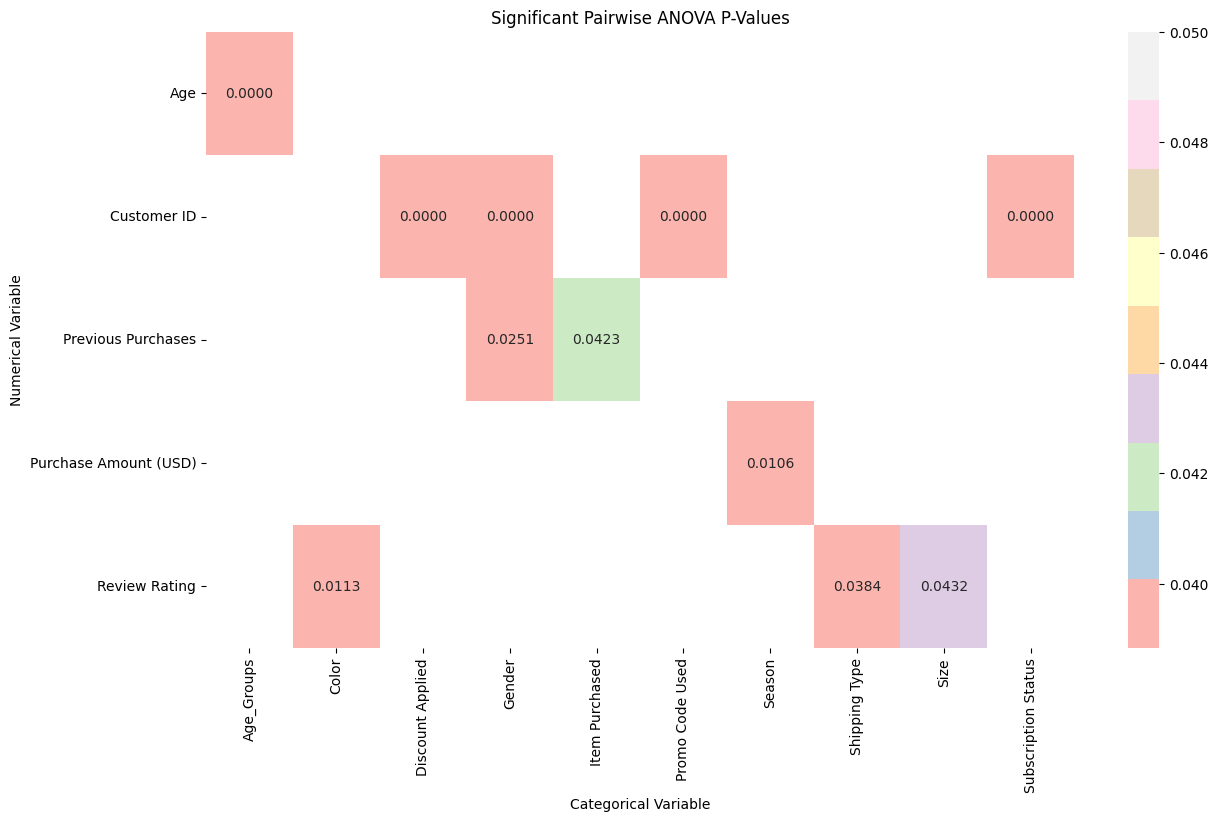

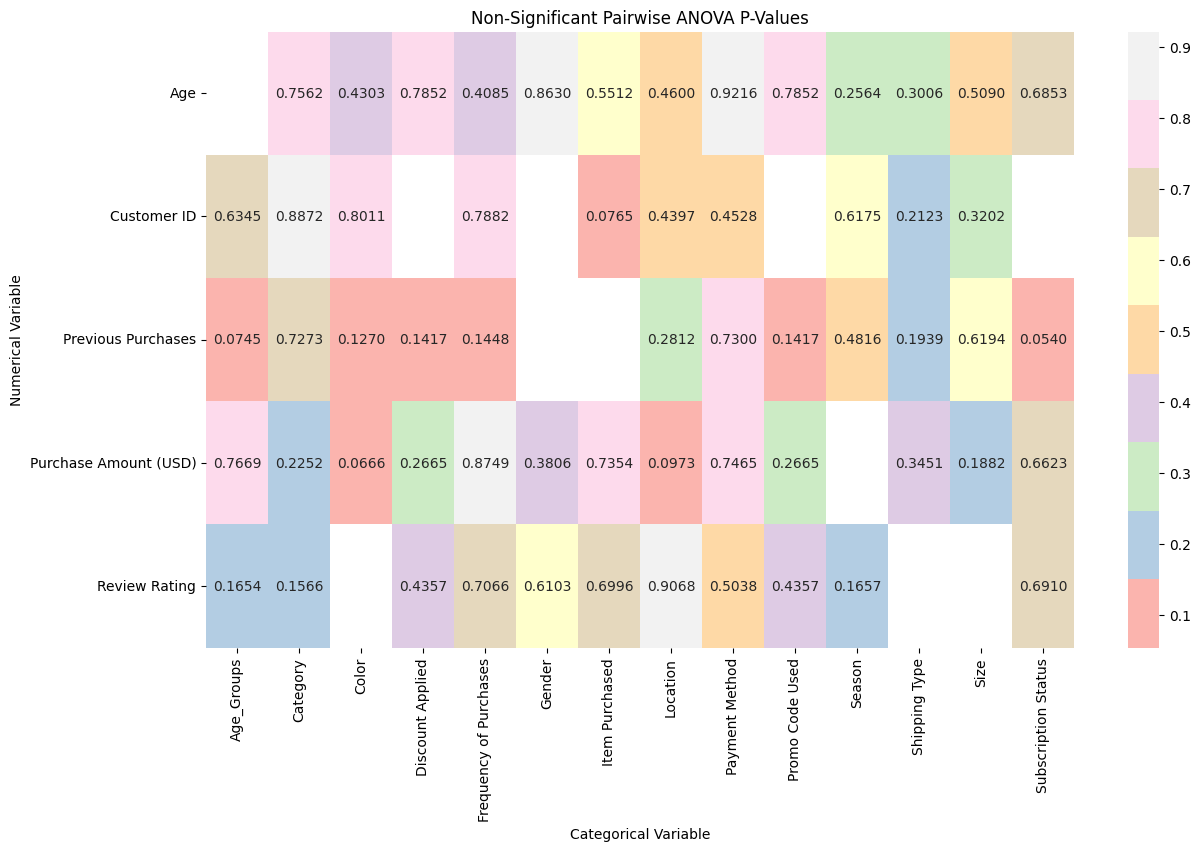

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


# Convert the results to a DataFrame
anova_results = pd.DataFrame(results)

# Separate ANOVA results into two DataFrames based on p-value threshold
significant_results = anova_results[anova_results['P-Value'] <= 0.05]
non_significant_results = anova_results[anova_results['P-Value'] > 0.05]

# Display the significant results
print("Significant ANOVA Results:")
print(significant_results)

# Display the non-significant results
print("\nNon-Significant ANOVA Results:")
print(non_significant_results)

# Create a pivot table for the heatmap of significant results
heatmap_data_significant = significant_results.pivot(index='Numerical Variable', columns='Categorical Variable', values='P-Value')

# Create a pivot table for the heatmap of non-significant results
heatmap_data_non_significant = non_significant_results.pivot(index='Numerical Variable', columns='Categorical Variable', values='P-Value')

# Create the heatmap with the custom colormap for significant results
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_significant, annot=True, cmap='Pastel1', cbar=True, fmt=".4f", vmin=0.05)
plt.title('Significant Pairwise ANOVA P-Values')
plt.show()

# Create the heatmap with the custom colormap for non-significant results
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_non_significant, annot=True, cmap='Pastel1', cbar=True, fmt=".4f")
plt.title('Non-Significant Pairwise ANOVA P-Values')
plt.show()
